In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from utils import logp as logp_scale
from utils import normalize, logf_Jacobian, quick_MVN_marginals, quick_MVN_scatter
from ManifoldHMCAlgorithms.mixture_manifoldhmc import MixtureManifoldHMC
import matplotlib.pyplot as plt
from math import degrees, radians
from numpy.linalg import svd
from math import sqrt, log, exp

In [2]:
# Parameters
mu = np.zeros(2)                                  # Center of the MVN
Sigma = np.array([[1.0, 0.99], [0.99, 2.0]])        # Covariance matrix of MVN
target = multivariate_normal(mean=mu, cov=Sigma)  # 2D distribution whose contours will be our manifolds

# Maximum level set value
z_max = target.pdf(mu)

In [3]:
N = 500000
n = 1
m = 300
alpha = 0.2
T = 5 
epsilon = 0.1    
tol = 1.48e-08
a_guess = 1.0
s = 0.5
M = np.eye(2)

In [4]:
x0 = target.rvs()
samples = MixtureManifoldHMC(x0=x0, alpha=alpha, N=N, n=n, m=m, Sigma=Sigma, mu=mu, 
                             T=T, epsilon=epsilon, M=M, s=s, tol=tol, a_guess=a_guess)

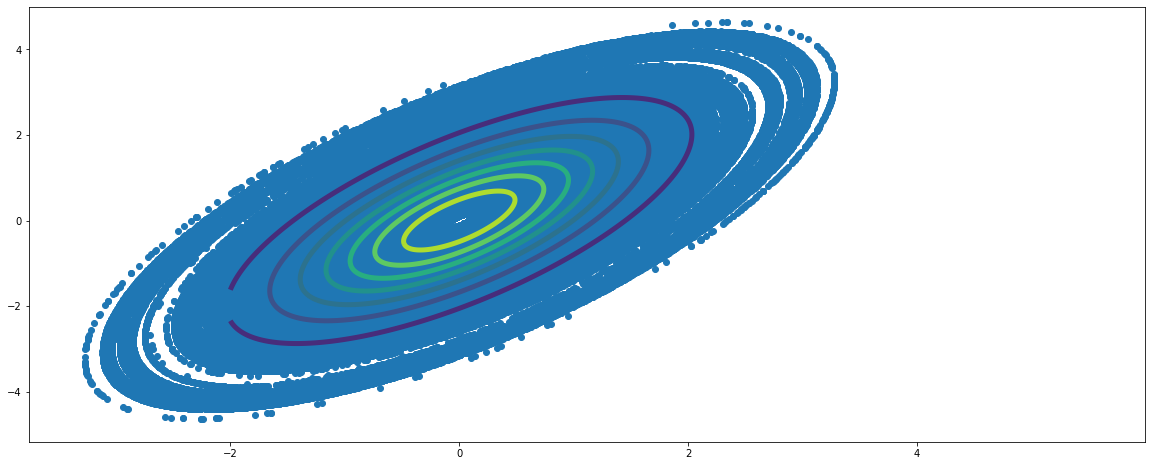

In [13]:
quick_MVN_scatter(samples, target)

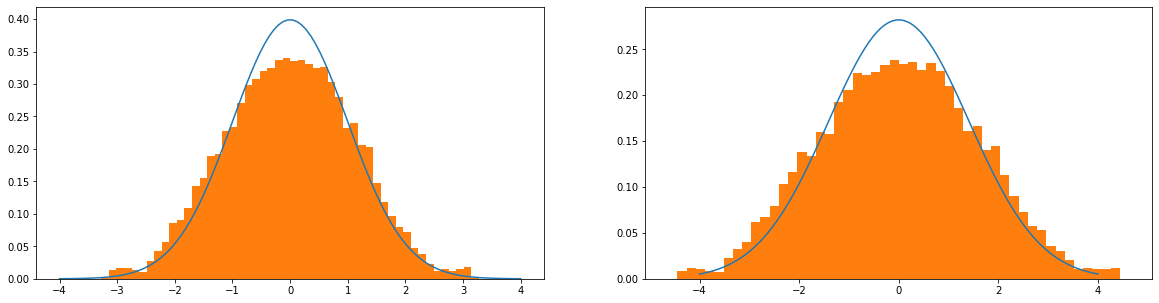

In [14]:
quick_MVN_marginals(samples, target)

In [15]:
mode = mu

# Thoughts

The target density on the manifold is given below.
$$
\log f({\bf{x}}) = \frac{1}{||\nabla_{\bf{x}} \log \pi ({\bf{x}})||}
$$

Suppose ${\bf{x}}_0$ is the mode $\pi$ with density value $\pi({\bf{x}}_0) = z_0$ 

$$
{\bf{x}}_0 = \max_{\bf{x}} \log \pi({\bf{x}})
$$

Suppose also that we are targeting a manifold that is close to the singular manifold defined at a mode.

$$
\mathcal{M} = \{{\bf{x}} \in \mathbb{R}^d\, :\, \pi({\bf{x}}) = z_M\} \qquad \text{ where } z_M \approx z_0
$$

Then this means that any point ${\bf{x}}\in \mathcal{M}$ will almost be a stationary point, hence

$$
\nabla_{\bf{x}} \log \pi({\bf{x}}) \approx {\bf{0}}  \qquad \forall {\bf{x}}\in \mathcal{M}
$$

Now suppose we use HMC to move to a point ${\bf{x}}\in \mathcal{M}$ on this manifold and we propose a value ${\bf{y}}\in \mathcal{M}$ using Zappa sampling. We would the reject ${\bf{y}}$ whenever for $u \in \mathcal{U}([0,1])$

$$
\log u > \frac{1}{||\nabla_{\bf{x}} \log \pi({\bf{y}})||} - \frac{1}{||\nabla_{\bf{x}} \log \pi({\bf{x}})||}  + \log p(v') - \log p(v)
$$

Since the manifold is very close to the mode we will have

$$
\frac{1}{||\nabla_{\bf{x}} \log \pi({\bf{y}})||} \approx \frac{1}{||\nabla_{\bf{x}} \log \pi({\bf{x}})||} \approx + \infty
$$

In [22]:
# STORE THE ACCEPTANCE RATIO, THE VS AND EVERYTHING ELSE. STORE BLOODY EVERYTHING.
# CHECK IF MODE IS SEVERELY UNDERESTIMATED ALSO FOR AN ISOTROPIC GAUSSIAN 
# HUG AND HOP HAS SAME ISSUE BUT FIXES IT VIA PRECONDITIONING. CAN WE DO SOMETHING SIMILAR?
# MAYBE THE PROBLEM COMES FROM THE FACT THAT WITH AN ISOTROPIC GAUSSIAN, WE HAVE ALL POINTS ON A CONTOUR
# THAT GIVE EXACTLY THE SAME GRADIENT VALUE. INSTEAD, WHEN THE GAUSSIAN IS AN ELLIPSE, SOME WILL HAVE MUCH
# LARGER GRADIENT THAN OTHERS ETC.
# OVERALL, ONCE ZAPPA REACHES THE FAR ENDS OF THE ELLIPSE, THEN IT WON'T MOVE AWAY (OR THE OTHER WAY AROUND)
